In [3]:
import pandas as pd
import re

In [4]:
# extracts only the digits in the filename, which represents the year
def extract_year(file):
    match = re.search(r'yob(\d{4})\.txt', file)
    return int(match.group(1)) if match else None

In [5]:
# creates a main df
rose_df = pd.DataFrame(columns=['Name', 'Gender', 'Number', 'Year'])

# reads the csv, creates header columns, adds a column for the year, and merges results to `rose_df`
def get_rose(file):
    global rose_df
    df = pd.read_csv(file, header = None)
    df.columns = ['Name', 'Gender', 'Number']
    year = extract_year(file)
    df['Year'] = year
    rose = df[df['Name'] == 'Rose']
    rose_df = pd.concat([rose_df, rose], ignore_index=True)

In [6]:
# defining ranges for years covered
start_year = 1997
end_year = 2023  

# looping so I don't have to manually input every year
for year in range(start_year, end_year + 1):
    filename = f'names/yob{year}.txt'
    get_rose(filename)

In [7]:
# checkpoint
rose_df

,Name,Gender,Number,Year
0,Rose,F,666,1997
1,Rose,F,1019,1998
2,Rose,F,1132,1999
3,Rose,F,1080,2000
4,Rose,F,1029,2001
5,Rose,F,922,2002
6,Rose,F,854,2003
7,Rose,F,895,2004
8,Rose,F,967,2005
9,Rose,F,961,2006


In [8]:
# save to new csv file
rose_df.to_csv('rose-totals.csv')

<Axes: xlabel='Year'>

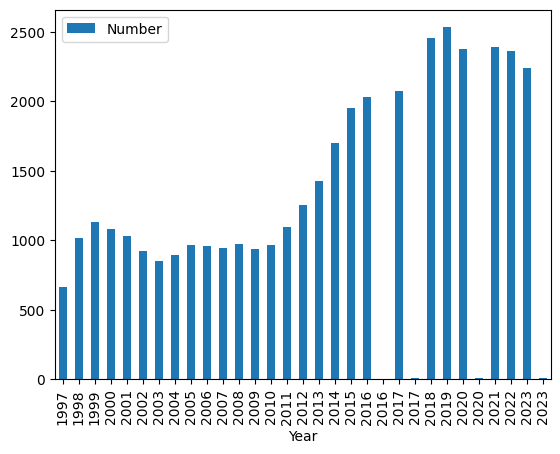

In [15]:
# creating charts to look at trend
import matplotlib.pyplot as plt

rose_df.plot(x = 'Year', y = 'Number', kind = 'bar')